In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import pandas as pd
df = pd.read_csv("train.csv")

# 평균 나이 집어넣기


In [45]:
# 새로운 데이터프레임 생성
new_df = df.copy() 

# 전체 나이 평균 계산 후 반올림
all_age_avg = round(new_df['Age'].mean())

# 나이가 비어있는 사람들에게 전체 평균 나이 할당
new_df.loc[new_df['Age'].isnull(), 'Age'] = all_age_avg

# 출력
print(new_df[['Name', 'Age']].assign(Name=new_df['Name'].str.slice(0, 15)))
new_df.info()


                Name    Age
0    Braund, Mr. Owe  22.00
1    Cumings, Mrs. J  38.00
2    Heikkinen, Miss  26.00
3    Futrelle, Mrs.   35.00
4    Allen, Mr. Will  35.00
5    Moran, Mr. Jame  30.00
6    McCarthy, Mr. T  54.00
7    Palsson, Master   2.00
8    Johnson, Mrs. O  27.00
9    Nasser, Mrs. Ni  14.00
10   Sandstrom, Miss   4.00
11   Bonnell, Miss.   58.00
12   Saundercock, Mr  20.00
13   Andersson, Mr.   39.00
14   Vestrom, Miss.   14.00
15   Hewlett, Mrs. (  55.00
16   Rice, Master. E   2.00
17   Williams, Mr. C  30.00
18   Vander Planke,   31.00
19   Masselmani, Mrs  30.00
20   Fynney, Mr. Jos  35.00
21   Beesley, Mr. La  34.00
22   McGowan, Miss.   15.00
23   Sloper, Mr. Wil  28.00
24   Palsson, Miss.    8.00
25   Asplund, Mrs. C  38.00
26   Emir, Mr. Farre  30.00
27   Fortune, Mr. Ch  19.00
28   O'Dwyer, Miss.   30.00
29   Todoroff, Mr. L  30.00
30   Uruchurtu, Don.  40.00
31   Spencer, Mrs. W  30.00
32   Glynn, Miss. Ma  30.00
33   Wheadon, Mr. Ed  66.00
34   Meyer, Mr. Edga

# 호칭과 나이 관계
호칭과 나이에 연관이 있을것으로 추정</br>
호칭 별로 나이를 평균낸 후 해당 호칭이 있는 사람 중 나이 값이 비어 있는 인원에게 나이를 할당해주었습니다.

In [46]:
# 새로운 데이터프레임 생성
new_df = df.copy()  # 원본 데이터프레임을 복사한 새로운 데이터프레임

# Mr, Mrs, Miss, Master, Dr, Rev, Ms가 있는지 확인하는 열을 추가
new_df['Has_Mr'] = new_df['Name'].str.contains(r'Mr\.')
new_df['Has_Mrs'] = new_df['Name'].str.contains(r'Mrs\.')
new_df['Has_Miss'] = new_df['Name'].str.contains(r'Miss\.')
new_df['Has_Master'] = new_df['Name'].str.contains(r'Master\.')
new_df['Has_Dr'] = new_df['Name'].str.contains(r'Dr\.')
new_df['Has_Rev'] = new_df['Name'].str.contains(r'Rev\.')
new_df['Has_Ms'] = new_df['Name'].str.contains(r'Ms\.')


# 각 직함별로 나이의 평균 계산 (결측값은 제외하고 계산 후 반올림)
mr_age_avg = round(new_df[new_df['Has_Mr'] == True]['Age'].mean())
mrs_age_avg = round(new_df[new_df['Has_Mrs'] == True]['Age'].mean())
miss_age_avg = round(new_df[new_df['Has_Miss'] == True]['Age'].mean())
master_age_avg = round(new_df[new_df['Has_Master'] == True]['Age'].mean())
dr_age_avg = round(new_df[new_df['Has_Dr'] == True]['Age'].mean())
rev_age_avg = round(new_df[new_df['Has_Rev'] == True]['Age'].mean())
ms_age_avg = round(new_df[new_df['Has_Ms'] == True]['Age'].mean())

# 전체 나이 평균 계산 후 반올림
all_age_avg = round(new_df['Age'].mean())

# 호칭이 있는 사람들에게 반올림한 평균 나이 주기
new_df.loc[(new_df['Has_Mr'] == True) & (new_df['Age'].isnull()), 'Age'] = mr_age_avg
new_df.loc[(new_df['Has_Mrs'] == True) & (new_df['Age'].isnull()), 'Age'] = mrs_age_avg
new_df.loc[(new_df['Has_Miss'] == True) & (new_df['Age'].isnull()), 'Age'] = miss_age_avg
new_df.loc[(new_df['Has_Master'] == True) & (new_df['Age'].isnull()), 'Age'] = master_age_avg
new_df.loc[(new_df['Has_Dr'] == True) & (new_df['Age'].isnull()), 'Age'] = dr_age_avg
new_df.loc[(new_df['Has_Rev'] == True) & (new_df['Age'].isnull()), 'Age'] = rev_age_avg
new_df.loc[(new_df['Has_Ms'] == True) & (new_df['Age'].isnull()), 'Age'] = ms_age_avg

# 아직 나이가 비어있는 사람들에게 전체 평균 나이 할당
new_df.loc[new_df['Age'].isnull(), 'Age'] = all_age_avg

# 출력
print(new_df[['Name', 'Age']].assign(Name=new_df['Name'].str.slice(0, 15)))
new_df.info()

                Name    Age
0    Braund, Mr. Owe  22.00
1    Cumings, Mrs. J  38.00
2    Heikkinen, Miss  26.00
3    Futrelle, Mrs.   35.00
4    Allen, Mr. Will  35.00
5    Moran, Mr. Jame  32.00
6    McCarthy, Mr. T  54.00
7    Palsson, Master   2.00
8    Johnson, Mrs. O  27.00
9    Nasser, Mrs. Ni  14.00
10   Sandstrom, Miss   4.00
11   Bonnell, Miss.   58.00
12   Saundercock, Mr  20.00
13   Andersson, Mr.   39.00
14   Vestrom, Miss.   14.00
15   Hewlett, Mrs. (  55.00
16   Rice, Master. E   2.00
17   Williams, Mr. C  32.00
18   Vander Planke,   31.00
19   Masselmani, Mrs  36.00
20   Fynney, Mr. Jos  35.00
21   Beesley, Mr. La  34.00
22   McGowan, Miss.   15.00
23   Sloper, Mr. Wil  28.00
24   Palsson, Miss.    8.00
25   Asplund, Mrs. C  38.00
26   Emir, Mr. Farre  32.00
27   Fortune, Mr. Ch  19.00
28   O'Dwyer, Miss.   22.00
29   Todoroff, Mr. L  32.00
30   Uruchurtu, Don.  40.00
31   Spencer, Mrs. W  36.00
32   Glynn, Miss. Ma  22.00
33   Wheadon, Mr. Ed  66.00
34   Meyer, Mr. Edga

# 요금과 나이의 관계 선형회귀

낼 수 있는 요금과 나이와의 관계가 있을것으로 추정 </br>
요금을 x축으로 나이를 y축으로 놓고 선형회귀를 진행했습니다.

In [47]:
from sklearn.linear_model import LinearRegression
import numpy as np

# 새로운 데이터프레임 생성
new3_df = df.copy()

# 요금과 나이 중 결측값이 아닌 데이터를 선택
valid_data = df[['Fare', 'Age']].dropna()

# x는 요금(Fare), y는 나이(Age)
x = valid_data[['Fare']].values  # 2D 배열로 변환
y = valid_data['Age'].values  # 1D 배열

# 선형 회귀 생성 및 학습
model = LinearRegression()
model.fit(x, y)

# 나이가 비어있는 경우 요금을 사용하여 나이를 예측하고 정수로 반올림하는 함수 정의
def predict_age(row):
    if pd.isnull(row['Age']):
        # 요금값을 이용하여 나이를 예측
        predicted_age = model.predict([[row['Fare']]])[0]
        # 예측된 나이를 반올림하여 반환
        return round(predicted_age)
    else:
        # 나이가 이미 있으면 원래 값을 반환
        return row['Age']

# apply 함수를 사용하여 Age 컬럼의 결측값 채우기
new3_df['Age'] = new3_df.apply(predict_age, axis=1)

# 출력
print(new3_df[['Name', 'Age']].assign(Name=new_df['Name'].str.slice(0, 15)))
new3_df.info()

                Name    Age
0    Braund, Mr. Owe  22.00
1    Cumings, Mrs. J  38.00
2    Heikkinen, Miss  26.00
3    Futrelle, Mrs.   35.00
4    Allen, Mr. Will  35.00
5    Moran, Mr. Jame  29.00
6    McCarthy, Mr. T  54.00
7    Palsson, Master   2.00
8    Johnson, Mrs. O  27.00
9    Nasser, Mrs. Ni  14.00
10   Sandstrom, Miss   4.00
11   Bonnell, Miss.   58.00
12   Saundercock, Mr  20.00
13   Andersson, Mr.   39.00
14   Vestrom, Miss.   14.00
15   Hewlett, Mrs. (  55.00
16   Rice, Master. E   2.00
17   Williams, Mr. C  29.00
18   Vander Planke,   31.00
19   Masselmani, Mrs  29.00
20   Fynney, Mr. Jos  35.00
21   Beesley, Mr. La  34.00
22   McGowan, Miss.   15.00
23   Sloper, Mr. Wil  28.00
24   Palsson, Miss.    8.00
25   Asplund, Mrs. C  38.00
26   Emir, Mr. Farre  29.00
27   Fortune, Mr. Ch  19.00
28   O'Dwyer, Miss.   29.00
29   Todoroff, Mr. L  29.00
30   Uruchurtu, Don.  40.00
31   Spencer, Mrs. W  33.00
32   Glynn, Miss. Ma  29.00
33   Wheadon, Mr. Ed  66.00
34   Meyer, Mr. Edga

그래프로 그려보니 유의미한 연관관계는 없을것 같긴 하네요

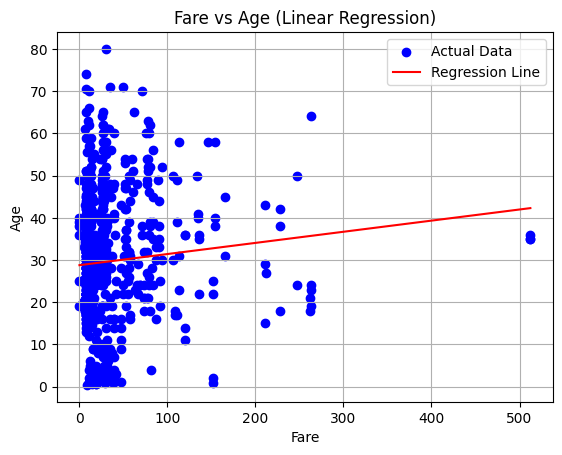

In [51]:
import matplotlib.pyplot as plt

# Step 1: 산점도 그리기 (실제 데이터)
plt.scatter(x, y, color='blue', label='Actual Data')

# Step 2: 학습된 선형 회귀 모델의 예측 결과를 선으로 그리기
x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)  # 요금 범위
y_pred = model.predict(x_range)  # 요금 범위에 대한 예측된 나이

# 회귀 직선 그리기
plt.plot(x_range, y_pred, color='red', label='Regression Line')

# 그래프 설정
plt.title('Fare vs Age (Linear Regression)')
plt.xlabel('Fare')
plt.ylabel('Age')
plt.legend()
plt.grid(True)
plt.show()